In [ ]:
import tweepy as tw
from textblob import TextBlob
from wordcloud import WordCloud
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')


In [4]:
from google.colab import files
data = files.upload()


TypeError: ignored

In [ ]:
# Getting vaccine tweets data from vaccination_all_tweets.csv or one of the splits for analysis
vacc_data = pd.read_csv('healthcare_workers.csv')
vacc_data.head()

,Unnamed: 0,id,user_name,user_description,text
0,19,1.337780e+18,Alex Vie,Marine vet. Yogi. Krav Maga. Runner. Climber. ...,The trump administration failed to deliver on ...
1,52,1.338620e+18,KaileyBen-Sassi,Specialist antimicrobial & lead OPAT pharmacis...,Building on last week’s ‘trial’ run and extend...
2,68,1.338590e+18,Susan Kirchdoerffer,"Physician, entrepreneur, lover of chocolate, r...",@MeghanMcCain As a physician currently with co...
3,92,1.338550e+18,Jennifer Robson,Respiratory Specialist Physiotherapist with an...,Half way there #COVID19 #CovidVaccine #vaccina...
4,103,1.338530e+18,Katie Crowfoot,Team Leader Occupational Therapist for Adult M...,Received my first dose of the #CovidVaccine #P...


In [ ]:
def clean_text(text):
  """
  This function cleans the tweets before further processing
  """
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/', '', text)
  text = re.sub(r't.co[a-z]*/[A-Za-z0-9]*','',text)
  return text


In [ ]:
# creating df for tweets from media_corp alone...
df_media_corp = pd.DataFrame(vacc_data['text'], columns=['text'])
# df_media_corp = vacc_data['text']
# print(type(df_media_corp))
df_media_corp.head()

,text
0,The trump administration failed to deliver on ...
1,Building on last week’s ‘trial’ run and extend...
2,@MeghanMcCain As a physician currently with co...
3,Half way there #COVID19 #CovidVaccine #vaccina...
4,Received my first dose of the #CovidVaccine #P...


In [ ]:
df_media_corp['text'] = df_media_corp['text'].apply(clean_text)

df_media_corp.head()

,text
0,The trump administration failed to deliver on ...
1,Building on last week’s ‘trial’ run and extend...
2,As a physician currently with covid I cried. ...
3,Half way there COVID19 CovidVaccine vaccinatio...
4,Received my first dose of the CovidVaccine Pfi...


In [ ]:
# Functions to get subjectivity and polarity...
def get_subjectivity(text):
  """
  Returns the subjectivity metric for a tweet
  """
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  """
  Returns the polarity metric for a tweet
  """
  return TextBlob(text).sentiment.polarity

# Creating two new columns
df_media_corp['subjectivity'] = df_media_corp['text'].apply(get_subjectivity)
df_media_corp['polarity'] = df_media_corp['text'].apply(get_polarity)

df_media_corp.head()


,text,subjectivity,polarity
0,The trump administration failed to deliver on ...,0.300000,-0.500000
1,Building on last week’s ‘trial’ run and extend...,0.133333,0.100000
2,As a physician currently with covid I cried. ...,0.400000,0.000000
3,Half way there COVID19 CovidVaccine vaccinatio...,0.166667,-0.166667
4,Received my first dose of the CovidVaccine Pfi...,0.488889,0.261111


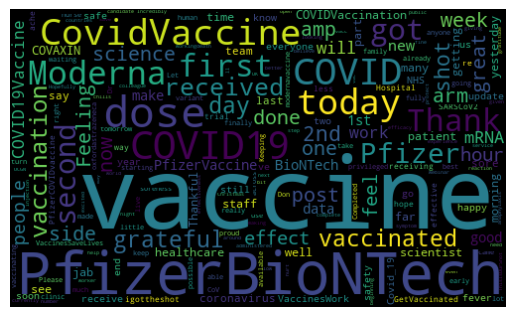

In [ ]:
# Visualizing wordcloud...
media_corp_wlist = ' '.join([tweets for tweets in df_media_corp['text']])
word_cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=100,collocations=False).generate(media_corp_wlist)

f = plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()
#f.savefig('wcld_healthcare_workers.jpg', bbox_inches='tight', pad_inches=0, dpi=2000)
f.savefig('wcld_healthcare_workers.pdf')

In [ ]:
# Function to classify tweets based on SCORE into FIVE categories
def classify_tweets(score):
  """
  Classify the tweets into one of FIVE different categories based on Polarity score
  """
  if 0.3 < score <= 1:
    return 'Strongly Positive'
  elif 0 < score <= 0.3:
    return 'Optimistic'
  elif -0.3 <= score < 0:
    return 'Skeptical'
  elif -1 <= score < -0.3:
    return 'Strongly Negative'
  else:
    return 'Neutral'

df_media_corp['classification'] = df_media_corp['polarity'].apply(classify_tweets)

df_media_corp.head()

,text,subjectivity,polarity,classification
0,The trump administration failed to deliver on ...,0.300000,-0.500000,Strongly Negative
1,Building on last week’s ‘trial’ run and extend...,0.133333,0.100000,Optimistic
2,As a physician currently with covid I cried. ...,0.400000,0.000000,Neutral
3,Half way there COVID19 CovidVaccine vaccinatio...,0.166667,-0.166667,Skeptical
4,Received my first dose of the CovidVaccine Pfi...,0.488889,0.261111,Optimistic


In [ ]:
# Sorting the tweets based on polarity just to assess the extent of extreme opinions... 
j = 1
sorted_df_media_corp = df_media_corp.sort_values(by='polarity')
sorted_df_media_corp['text']

# for i in range(0, sorted_df_media_corp.shape[0]):
#   if sorted_df_media_corp['classification'][i] == 'Strongly Positive':   # kind of tweets we are interested in
#     print(str(j) + ') ' + df_media_corp['text'][i])
#     print()
#     j += 1


677    Be scared. Be fearful. Be petrified. Take the ...
143    Be scared. Be fearful. Be petrified. Take the ...
353    Pfizer-Biontech COVID-19 Vaccine Dose 1 taken!...
0      The trump administration failed to deliver on ...
335    As a HCP of Indian origin, I took the vaccine....
                             ...                        
785    Best feeling when I got my CovidVaccine let’s ...
638    Working the COVID vaccine clinic all day today...
171    Why are we applying emotion to this? PfizerBio...
337    Day 3 post Covid vaccine and I feel great! Loo...
315    Proudly Vaccinated!\nOur GP surgery has worked...
Name: text, Length: 874, dtype: object

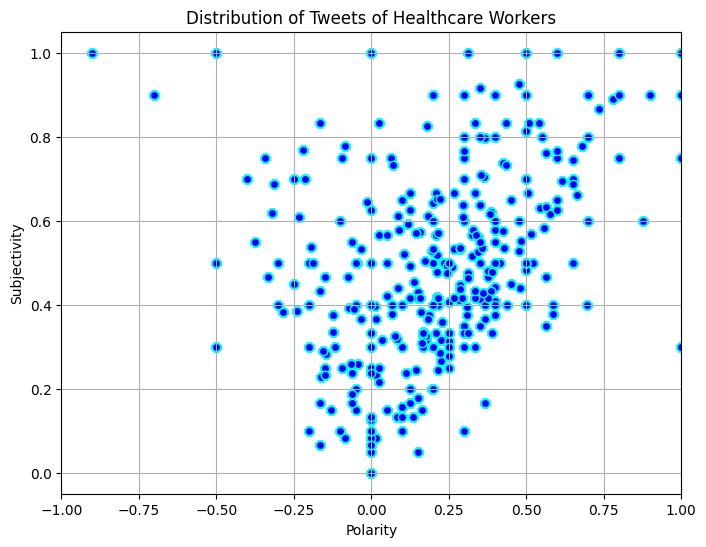

In [ ]:
# Polarity vs Subjectivity Analysis...
g = plt.figure(figsize=(8,6))

for i in range(df_media_corp.shape[0]):
  plt.scatter(df_media_corp['polarity'], df_media_corp['subjectivity'], color='blue', edgecolors='cyan' )

plt.title('Distribution of Tweets of Healthcare Workers')
plt.grid()
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.xlim(-1,1)
plt.show()
g.savefig('scatplot_healthcare_workers.jpg')